In [2]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, ConfusionMatrixDisplay

from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    path='/home/vedant/projects/'
elif platform == "darwin":
    # OS X
    path='/Users/vedant/Desktop/Programming/'

In [3]:
X_train=np.load(f'{path}ScreamDetection/resources/working_data/x_train.npy',allow_pickle = True)
y_train=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_train_hot.npy',allow_pickle = True),axis=1)

X_test=np.load(f'{path}ScreamDetection/resources/working_data/x_test.npy',allow_pickle = True)
y_test=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_test_hot.npy',allow_pickle = True),axis=1)

X_valid=np.load(f'{path}ScreamDetection/resources/working_data/x_valid.npy',allow_pickle = True)
y_valid=np.argmax(np.load(f'{path}ScreamDetection/resources/working_data/y_valid_hot.npy',allow_pickle = True),axis=1)

## RF results for 3 classes with test set accuracies

Overall Accuracy Score: 0.8050314465408805
Class-wise accuracy:
[0.66412214 0.33587786 0.        ]
[0.19113573 0.78116343 0.02770083]
[0.05610561 0.04950495 0.89438944]
Macro Accuracy: 0.7647608189796892
Confusion Matrix:


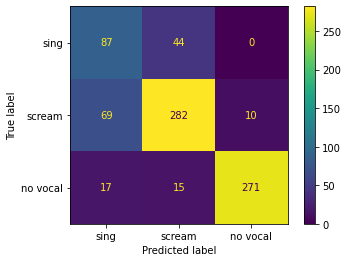

In [8]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)
score=precision_score(y_test, RF_prediction, average='macro')
cm = confusion_matrix(y_test, RF_prediction) # clean, highfry, layered, lowfry, midfry, no vocals
acc = accuracy_score(y_test,RF_prediction)
print(f"Overall Accuracy Score: {acc}")
print("Class-wise accuracy:")
for row in cm:
    print(row/row.sum())
print(f"Macro Accuracy: {score}")

print("Confusion Matrix:")
# print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['sing','scream','no vocal']).plot()